In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df['location'] = df['location'].fillna(df['location'].mode()[0]) # Categorical Column
df['bath'] = df['bath'].fillna(df['bath'].median())
df['balcony'] = df['balcony'].fillna(df['balcony'].median())
df['size'] = df['size'].fillna(df['size'].mode()[0]) # Categorical Column

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

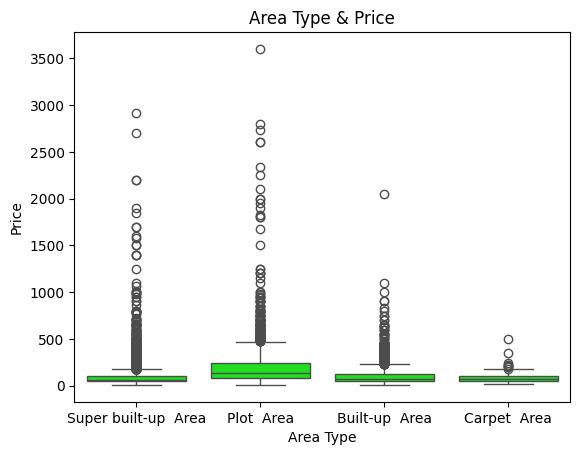

In [8]:
ax = sns.boxplot(x='area_type',y='price',data=df,color='lime')
ax.set_xlabel('Area Type')
ax.set_ylabel('Price')
ax.set_title('Area Type & Price')
plt.show()

In [9]:
df['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [10]:
df.drop(columns=['society', 'availability'], axis=1, inplace=True)

In [11]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [12]:
df.drop(columns='size', inplace=True)

In [13]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
df['total_sqft'] = df['total_sqft'].apply(convertRange)

In [16]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [17]:
df['bath'] = df['bath'].astype('int')
df['balcony'] = df['balcony'].astype('int')

# Price per square feet

In [18]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [19]:
df.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2,1,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5,3,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2,3,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2,1,51.00,2,4250.000000


In [20]:
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [21]:
df['location'].value_counts()

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [22]:
df['location'] = df['location'].apply(lambda x: x.strip() if isinstance(x, str) else x)
location_count = df.location.value_counts()
location_count

location
Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

In [23]:
location_count_l10 = location_count[location_count<=10]
location_count_l10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [24]:
df.location.value_counts()

location
Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

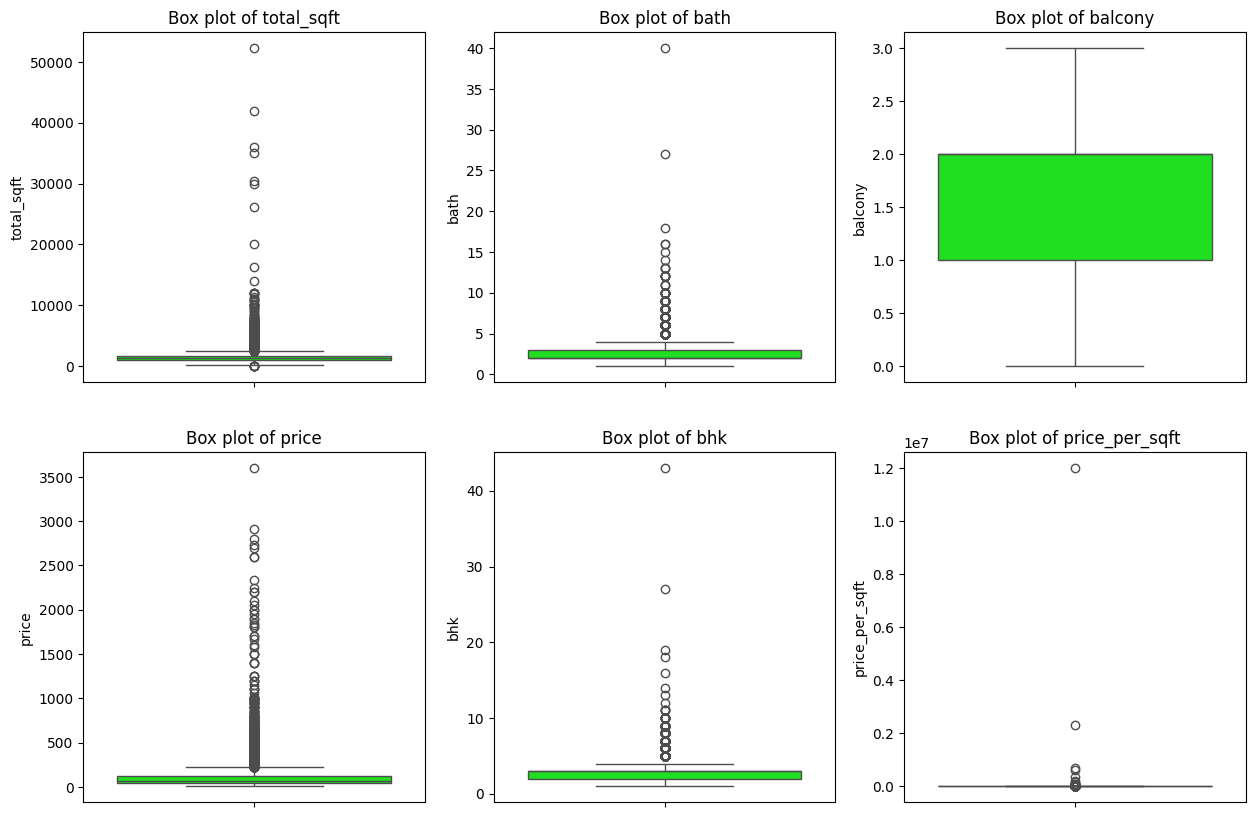

In [25]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col],color='lime')
    plt.title(f'Box plot of {col}')

plt.show()

In [26]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [27]:
numeric_columns.remove('bhk')

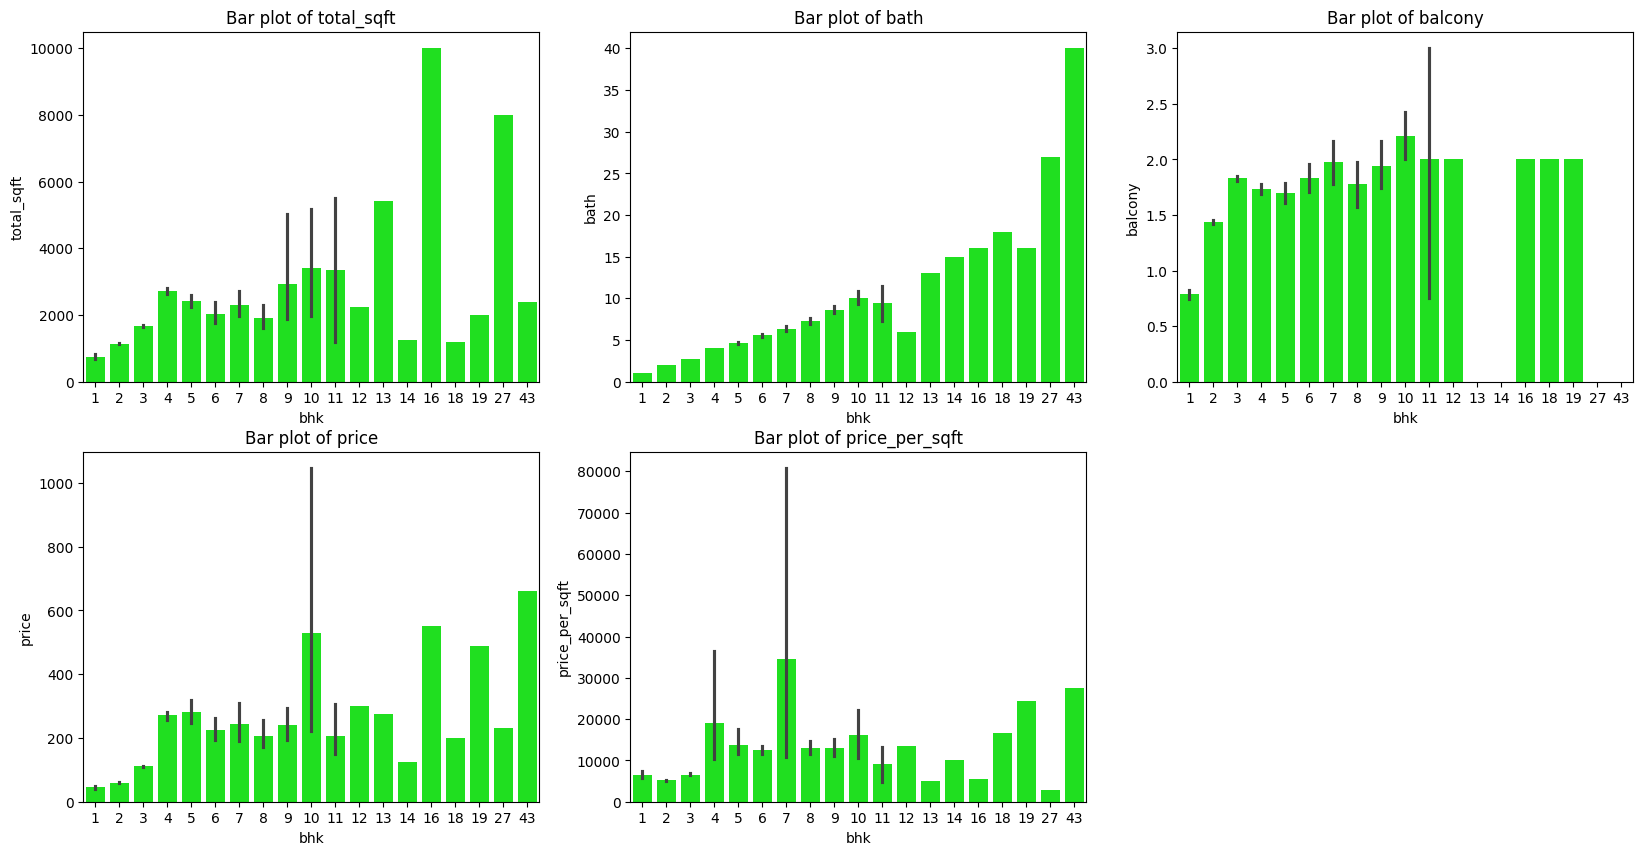

In [28]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=df['bhk'],y=df[col],color='lime')
    plt.title(f'Bar plot of {col}')

<Axes: xlabel='bhk', ylabel='total_sqft'>

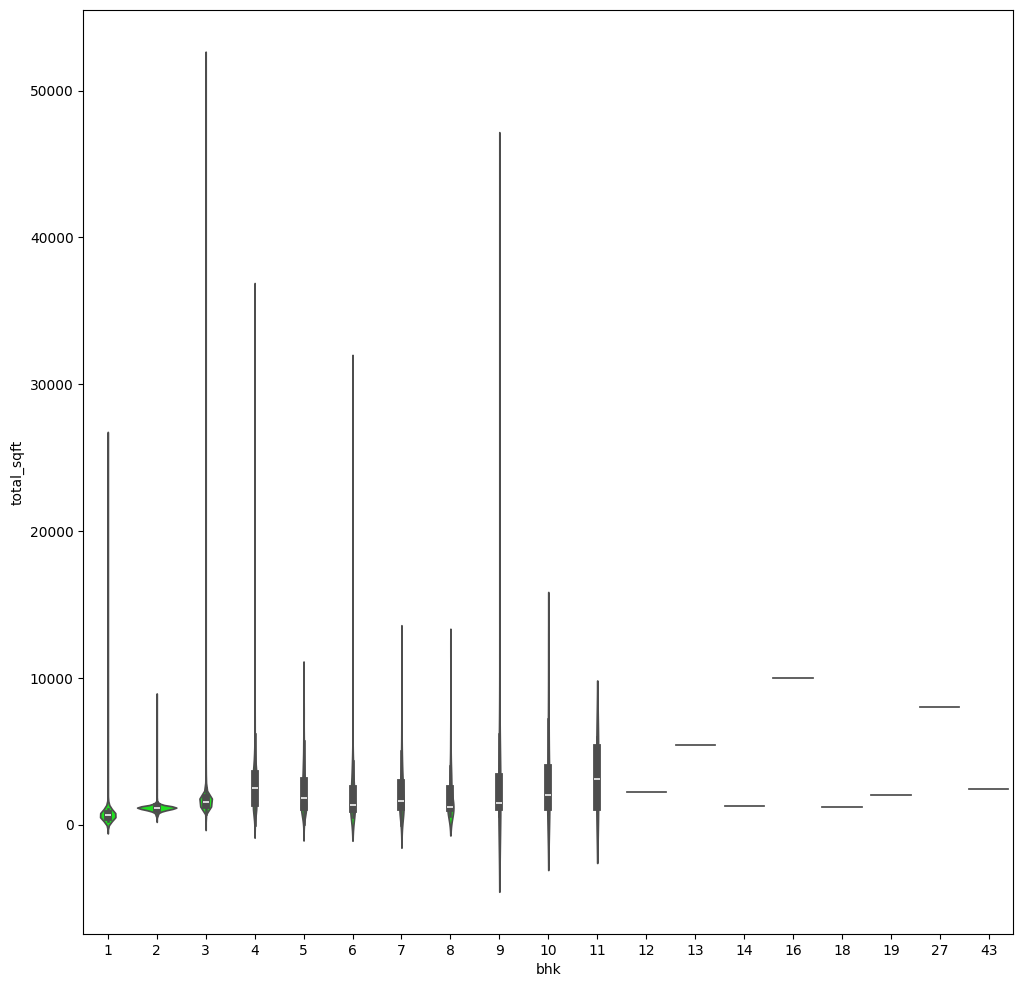

In [29]:
plt.figure(figsize=(12,12))
sns.violinplot(data=df,y=df['total_sqft'],x=df['bhk'],color='lime')

<Axes: xlabel='bhk', ylabel='bath'>

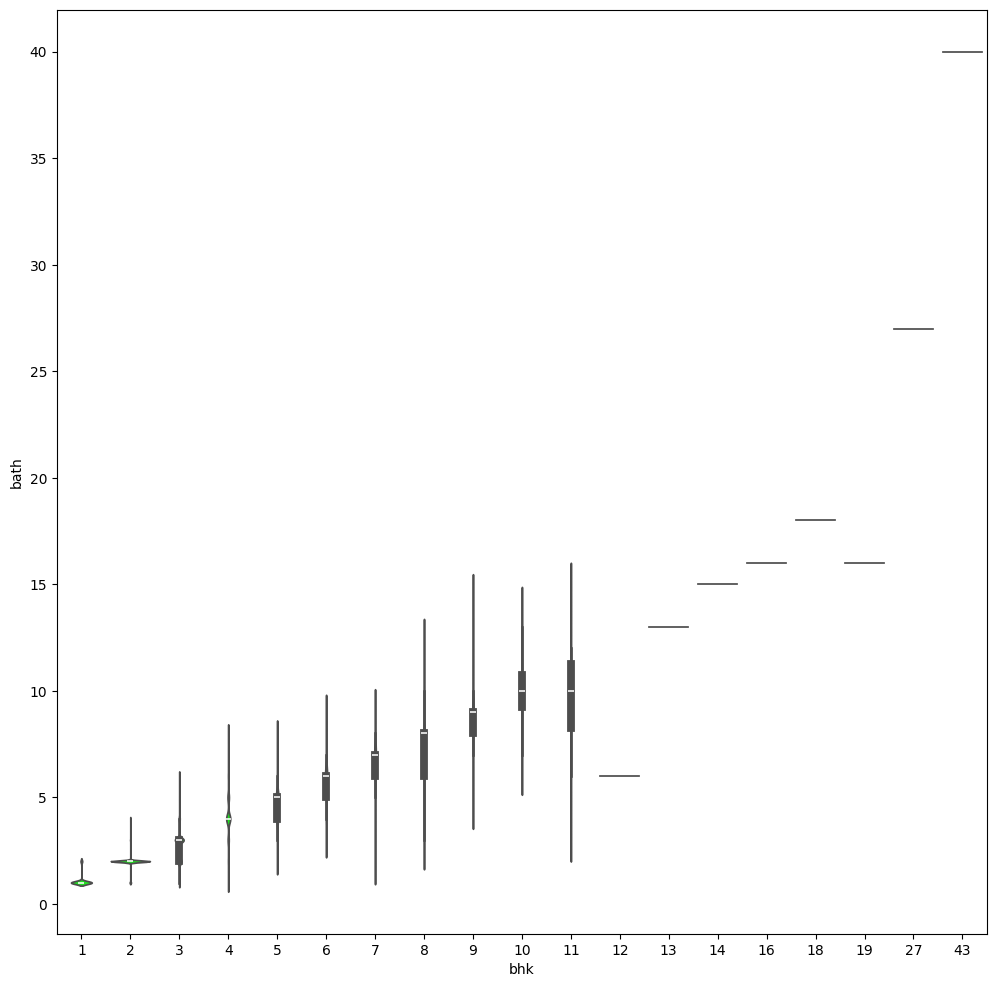

In [30]:
plt.figure(figsize=(12,12))
sns.violinplot(data=df,y=df['bath'],x=df['bhk'],color='lime')

<Axes: xlabel='bhk', ylabel='balcony'>

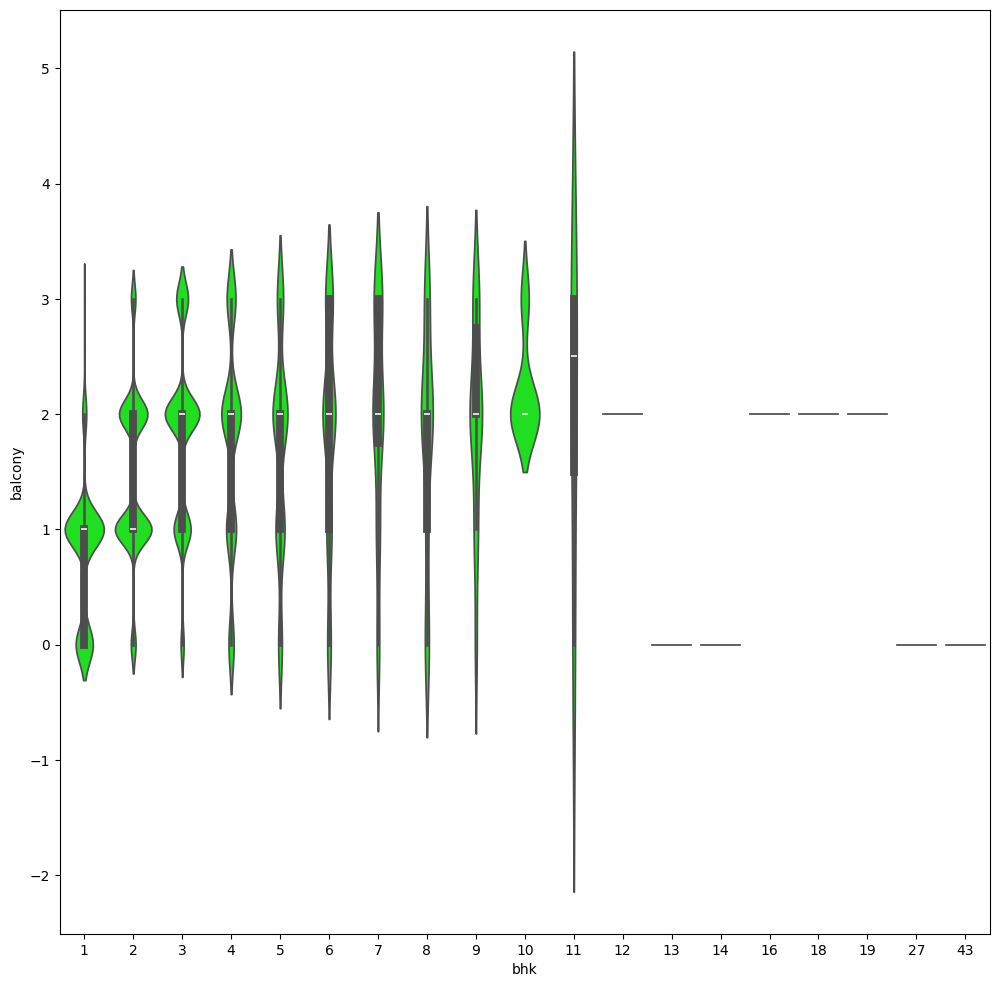

In [31]:
plt.figure(figsize=(12,12))
sns.violinplot(data=df,y=df['balcony'],x=df['bhk'],color='lime')

<Axes: xlabel='bhk', ylabel='price'>

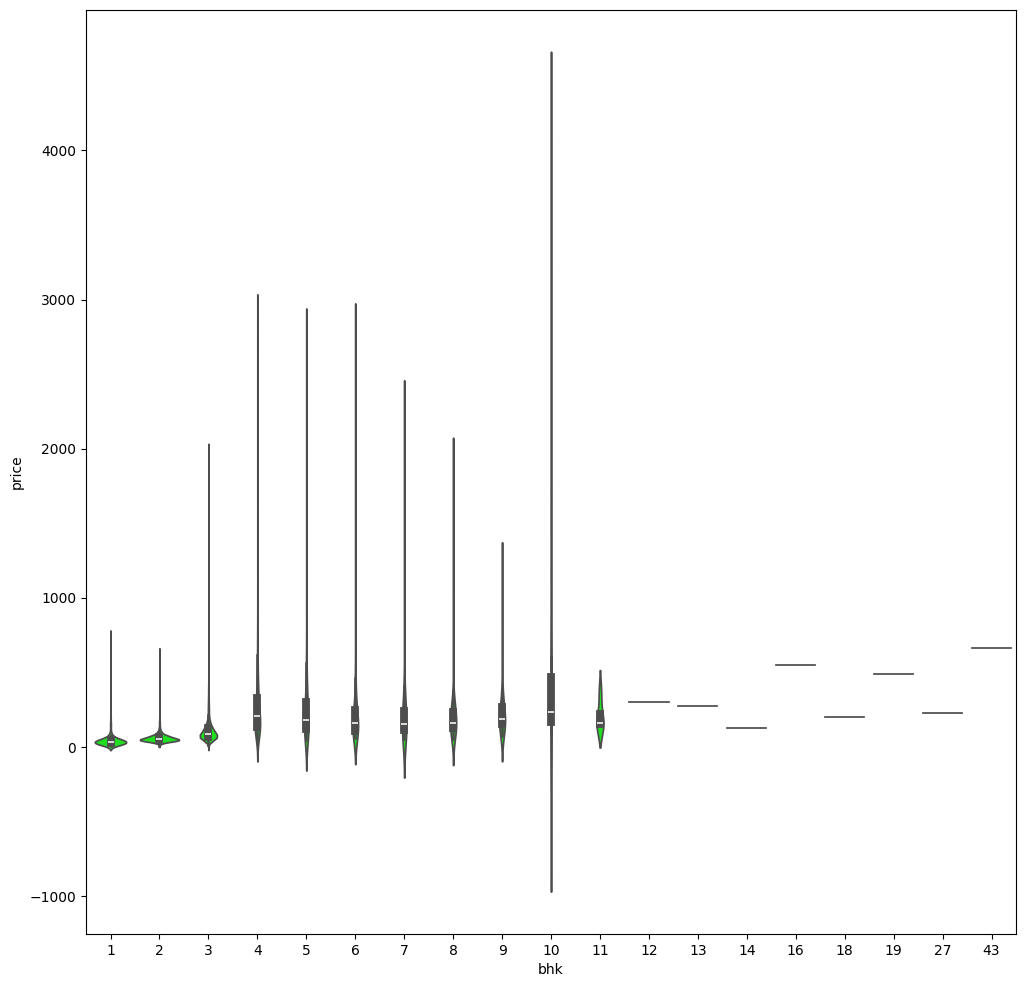

In [32]:
plt.figure(figsize=(12,12))
sns.violinplot(data=df,y=df['price'],x=df['bhk'],color='lime')

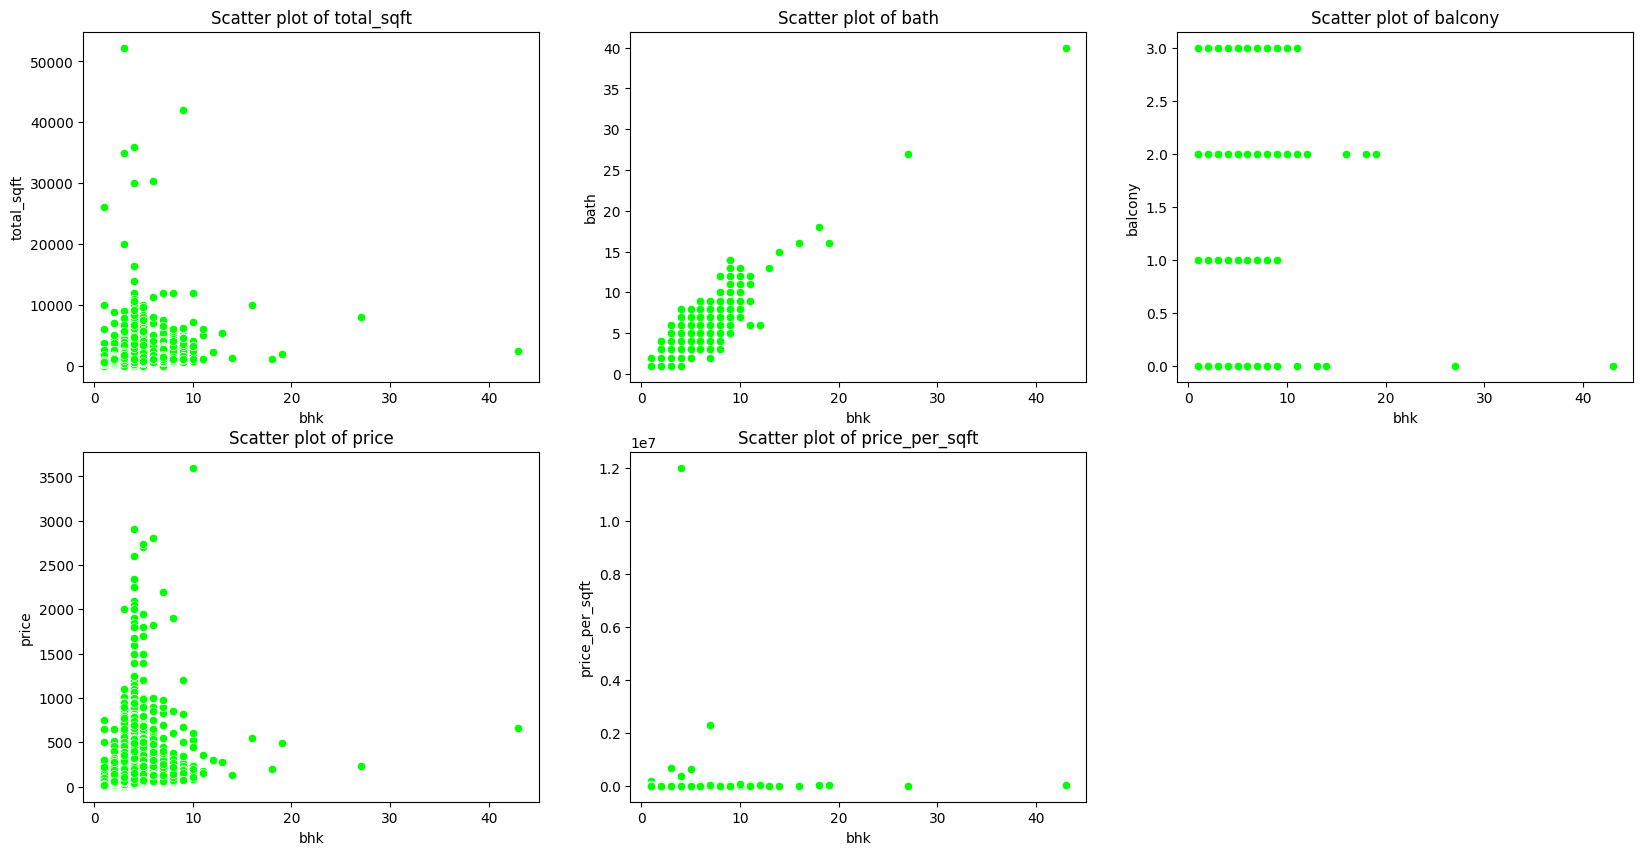

In [33]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df['bhk'],y=df[col],color='lime')
    plt.title(f'Scatter plot of {col}')

In [34]:
df.drop(columns=['area_type'],axis=1,inplace=True)

In [35]:
s3 = skew(df['price'],axis = 0)
s4 = skew(df['total_sqft'],axis = 0)
k3 = kurtosis(df['price'],axis = 0)
k4 = kurtosis(df['total_sqft'],axis = 0)
print("The skewness of price is: ",s3,"\nThe skewness of total sqft is: ",s4,"\nThe kurtosis of price is: ",k3,"\nThe kurtosis of total sqft is: ",k4)

The skewness of price is:  8.063560631960025 
The skewness of total sqft is:  nan 
The kurtosis of price is:  108.12546355090434 
The kurtosis of total sqft is:  nan


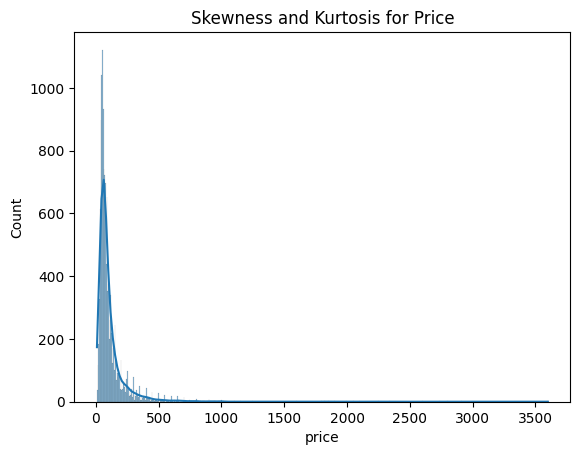

In [36]:
sns.histplot(data=df,x = 'price',kde=True)
plt.title("Skewness and Kurtosis for Price")
plt.show()

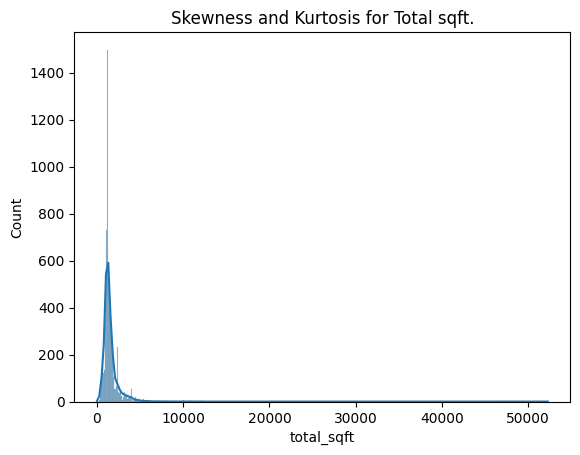

In [37]:
sns.histplot(data=df,x = 'total_sqft',kde=True)
plt.title("Skewness and Kurtosis for Total sqft.")
plt.show()

# Oulier Removal

In [38]:
def remove_outliers_sqft(df):
    new_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        df2=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        new_df=pd.concat([new_df,df2], ignore_index=True)
    return new_df
df=remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,1512.499379,2.527583,1.604559,98.328323,2.636633,6034.692903
std,921.214026,1.055298,0.787190,116.548467,0.981374,7262.767194
min,11.000000,1.000000,0.000000,8.000000,1.000000,1150.172117
25%,1100.000000,2.000000,1.000000,49.070000,2.000000,4273.504274
50%,1280.000000,2.000000,2.000000,68.000000,3.000000,5259.653795
75%,1650.000000,3.000000,2.000000,104.000000,3.000000,6643.869077
max,30400.000000,14.000000,3.000000,2912.000000,10.000000,672727.272727


In [39]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis=0)

In [40]:
df=bhk_outlier_remover(df)

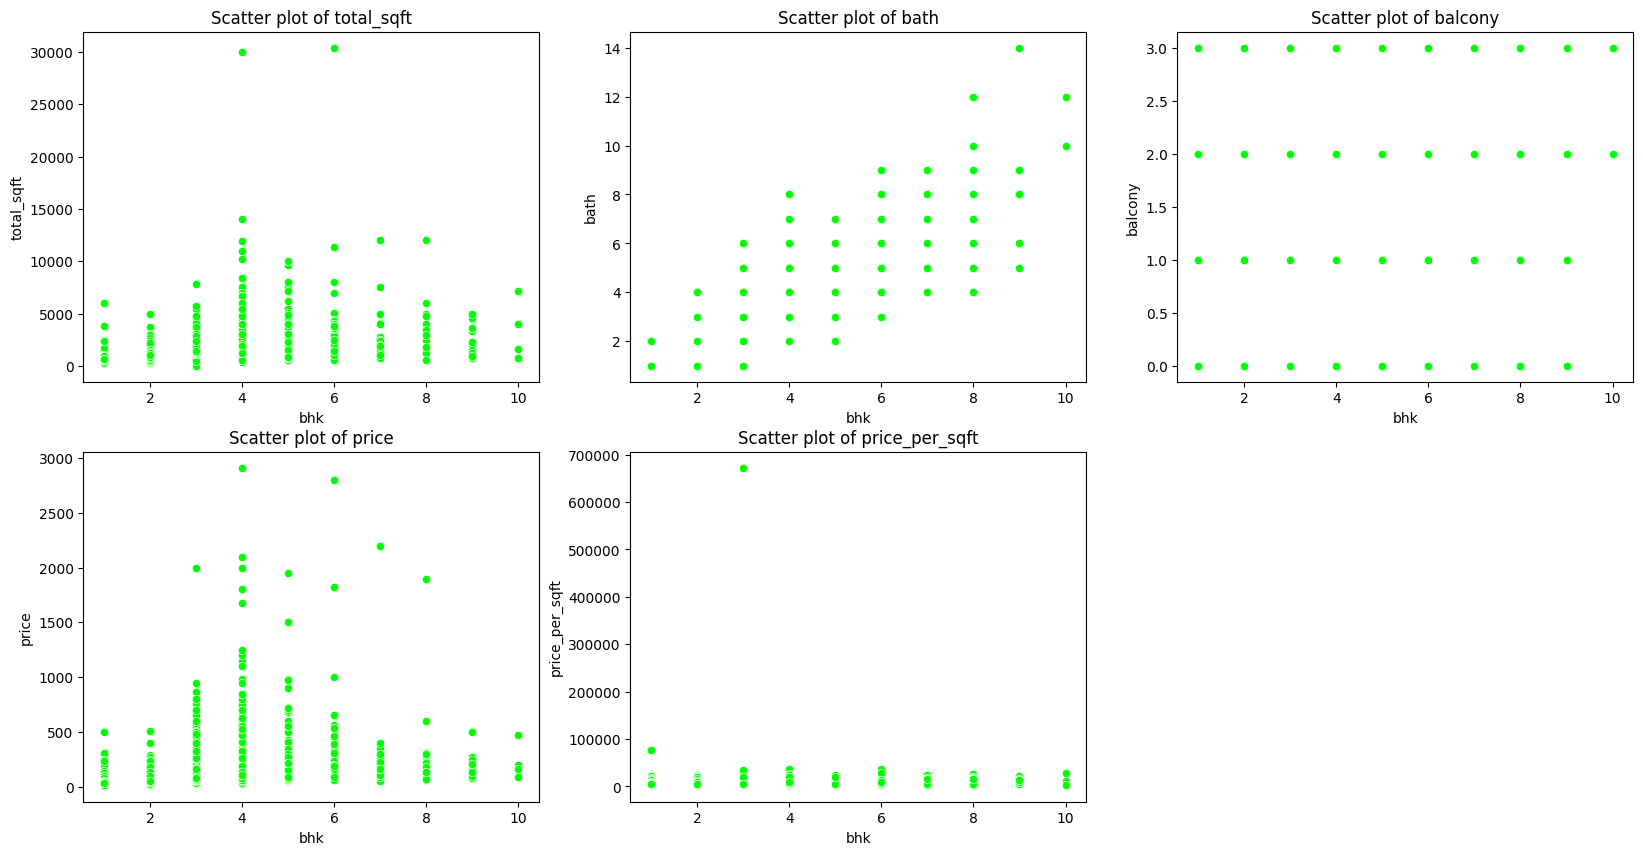

In [41]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df['bhk'],y=df[col],color='lime')
    plt.title(f'Scatter plot of {col}')

In [42]:
s1 = skew(df['price'],axis = 0)
s2 = skew(df['total_sqft'],axis = 0)
k1 = kurtosis(df['price'],axis = 0)
k2 = kurtosis(df['total_sqft'],axis = 0)
print("The skewness of price is: ",s1,"\nThe skewness of total sqft is: ",s2,"\nThe kurtosis of price is: ",k1,"\nThe kurtosis of total sqft is: ",k2)

The skewness of price is:  8.581472918028057 
The skewness of total sqft is:  9.239678268781637 
The kurtosis of price is:  125.81306038561587 
The kurtosis of total sqft is:  206.55942755338393


### Best places to buy house in Bengaluru are these: -

In [43]:
bhk_counts = df['bhk'].value_counts()
bhk_1 = df[df['bhk'] == 1]
bhk_2 = df[df['bhk'] == 2]
bhk_3 = df[df['bhk'] == 3]
bhk_4 = df[df['bhk'] == 4]
bhk_5 = df[df['bhk'] == 5]
print(bhk_counts.sort_index(ascending=True))

bhk
1      504
2     4042
3     2661
4      675
5      151
6       87
7       30
8       35
9       18
10       4
Name: count, dtype: int64


### Best locations and houses to buy for 1 BHK

In [44]:
print("Best 1 BHK houses are: \n",bhk_1[bhk_1['price_per_sqft'] <= 2200])

Best 1 BHK houses are: 
              location  total_sqft  bath  balcony  price  bhk  price_per_sqft
785          Attibele       550.0     1        1  11.50    1     2090.909091
1983       Chandapura       530.0     1        0  11.66    1     2200.000000
1998       Chandapura       630.0     1        0  13.86    1     2200.000000
2677  Electronic City       550.0     1        1  12.00    1     2181.818182
2732  Electronic City       605.0     1        0  13.31    1     2200.000000


### Best locations and houses to buy for 2 BHK

In [45]:
print("Best 2 BHK houses are:\n",bhk_2[bhk_2['price_per_sqft'] < 2407])

Best 2 BHK houses are:
                       location  total_sqft  bath  balcony  price  bhk  \
2953  Electronic City Phase II      1300.0     2        2   28.0    2   
4844                Kadabagere       675.0     1        1   15.0    2   
4847                Kadabagere       675.0     2        2   13.5    2   
6540               Mysore Road      1800.0     2        2   42.3    2   
7661                  Sarjapur      1205.0     2        2   29.0    2   

      price_per_sqft  
2953     2153.846154  
4844     2222.222222  
4847     2000.000000  
6540     2350.000000  
7661     2406.639004  


### Best locations and houses to buy for 3 BHK

In [46]:
print("Best 3 BHK houses are: \n",bhk_3[bhk_3['price_per_sqft'] <= 2888])

Best 3 BHK houses are: 
          location  total_sqft  bath  balcony  price  bhk  price_per_sqft
4382       Huskur      1220.0     2        1  35.23    3     2887.704918
4384       Huskur      1310.0     2        1  37.83    3     2887.786260
4388       Huskur      1400.0     2        1  40.43    3     2887.857143
8764  Tunganagara      1936.0     2        2  54.21    3     2800.103306
8765  Tunganagara      1270.0     2        1  35.56    3     2800.000000


### Best locations and houses to buy for 4 BHK

In [47]:
print("Best 4 BHK houses are: \n",bhk_4[bhk_4['price_per_sqft'] < 3056])

Best 4 BHK houses are: 
           location  total_sqft  bath  balcony  price  bhk  price_per_sqft
666         Anekal      1200.0     2        1   36.0    4     3000.000000
695     Anjanapura      1800.0     4        2   55.0    4     3055.555556
1291  Basavanagara      2000.0     3        2   25.0    4     1250.000000
2525   Dommasandra      2700.0     3        2   68.0    4     2518.518519
6731   Nelamangala      1470.0     4        2   34.5    4     2346.938776


### Best locations and houses to buy for 5 BHK

In [48]:
print("Best 5 BHK houses are: \n",bhk_5[bhk_5['price_per_sqft'] <= 4000])

Best 5 BHK houses are: 
             location  total_sqft  bath  balcony  price  bhk  price_per_sqft
2142   Chikkabanavar      2000.0     4        0   65.0    5     3250.000000
4105  Horamavu Agara      2400.0     3        3   80.0    5     3333.333333
5547         Kengeri      2500.0     4        3  100.0    5     4000.000000
6086       MS Pallya      1800.0     4        1   68.0    5     3777.777778
6642      Nagasandra      4050.0     5        2  140.0    5     3456.790123


#### Have taken only till 5 BHK because majority of houses were bought in these range only

In [49]:
df.shape

(8207, 7)

In [50]:
df.drop(columns='price_per_sqft', inplace=True)

# Cleaned df

In [51]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block BEL Layout,1540.0,3,2,85.0,3
1,1st Block HBR Layout,600.0,1,0,45.0,1
2,1st Block HBR Layout,3150.0,4,2,150.0,4
3,1st Block HRBR Layout,1200.0,7,0,235.0,8
4,1st Block HRBR Layout,2400.0,7,3,355.0,7


In [52]:
df.to_csv('Cleaned_df.csv')